In [92]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [93]:
df= pd.read_csv('Zip_Zhvi_2bedroom.csv')
df_NY = df[df['City']=='New York']
df_ny_years=df_NY[df_NY.columns[-138:]]
df_ny_years_t=df_ny_years.transpose()
dict_col={i:v for i,v in zip(df_ny_years_t.columns,df_NY['RegionName'])}
df_ny_years_t=df_ny_years_t.rename(columns=dict_col)
df_ny_years_t.reset_index(inplace=True)
df_ny_years_t['Date']=df_ny_years_t['index']
df_ny_years_t.drop('index',axis=1,inplace=True)
df_ny_years_t['Date']=pd.to_datetime(df_ny_years_t['Date'],infer_datetime_format=True)
df_ny_years_t.set_index('Date',inplace=True)

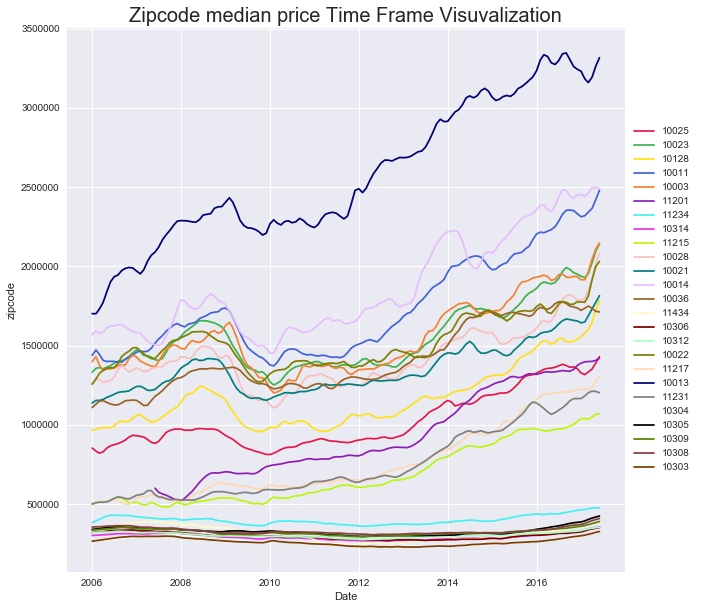

In [94]:
#Plot graph
sns.set()
plt.figure(figsize=(10,10))
plt.xlabel("Date")
plt.ylabel('zipcode')
plt.title('Zipcode median price Time Frame Visuvalization',fontsize=20, ha='center')
color=['#e6194b', '#3cb44b', '#ffe119', '#4363d8', '#f58231', '#911eb4', '#46f0f0', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#9a6324', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000','#568203','#87413F','#7B3F00']
for i,v in zip(df_ny_years_t.columns,color):
    name="'"+str(i)+"'"
    name=df_ny_years_t[i]
    plt.plot(name,color=v)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [95]:
def change_in_percent(v,x):
    change_dict={}
    for i in df_ny_years_t.columns:
        if i == 11201:
            change_dict[i] = 'later'
        else:
            val = df_NY[df_NY['RegionName']==i]
            change_in_price = val[x].sum()-val[v].sum()
            percentage = (change_in_price / val[x].sum()) * 100
            change_dict[i]=round(percentage,3)
    return change_dict 
def change_in_percent_without_miss(v,x):
    change_dict={}
    for i in df_ny_years_t.columns:
        val = df_NY[df_NY['RegionName']==i]
        change_in_price = val[x].sum()-val[v].sum()
        percentage = (change_in_price / val[x].sum()) * 100
        change_dict[i]=round(percentage,3)
    return change_dict 
change_dict_2006_2010=change_in_percent(v=df_NY.columns[-138],x=df_NY.columns[-91])
# for zipcode 11201 values are starting from 2007 so we need to approximate the starting value of zipcode 11201 for 2006 to 2007;
# take the time frame from 200601 to2007 .6
perct=[]
for i in df_ny_years_t.columns:
    if i == 11201:
        print("i")
    else:
        v=df_NY.columns[-138]
        x=df_NY.columns[-121]        
        val = df_NY[df_NY['RegionName']==i]
        change_in_price = val[x].sum()-val[v].sum()
        percentage = (change_in_price / val[x].sum()) * 100
        perct.append(percentage)
approximat_m=np.mean(perct)
val = df_NY[df_NY['RegionName']==11201]
approximate_2016_11201=round(val[df_NY.columns[-121]].sum()-((val[df_NY.columns[-121]].sum())*(approximat_m/100)),3)
change_dict_2006_2010[11201]=round(((val[df_NY.columns[-91]].sum()-approximate_2016_11201)/val[df_NY.columns[-91]].sum())*100,3)
change_dict_2010_2014=change_in_percent_without_miss(v=df_NY.columns[-90],x=df_NY.columns[-43])
change_dict_2014_2017=change_in_percent_without_miss(v=df_NY.columns[-42],x=df_NY.columns[-1])

i


In [96]:
coulumn_names=df_NY.columns[:7] 
coulumn_names=coulumn_names.append(df_NY.columns[-138:])
df_NY_2006_2017=df_NY[coulumn_names]
df_NY_2006_2017['change_in_price2006_2010']=change_dict_2006_2010.values()
df_NY_2006_2017['change_in_price2010_2014']=change_dict_2010_2014.values()
df_NY_2006_2017['change_in_price2014_2017']=change_dict_2014_2017.values()
df_NY_2006_2017.head()
df_NY_2006_2017.to_csv("df_NY_2006_2017.csv")

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.

Text(0.5,1,'Size Rank vs  Price')

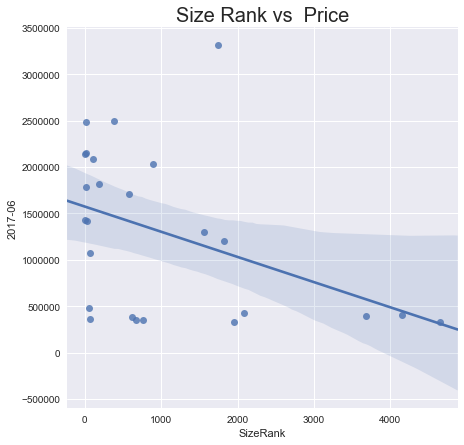

In [97]:
plt.figure(figsize=(7,7))
sns.regplot(x=df_NY_2006_2017['SizeRank'],y=df_NY_2006_2017['2017-06'])
plt.title("Size Rank vs  Price",fontsize=20, ha='center')

,SizeRank,2017-06
SizeRank,1.000000,-0.419865
2017-06,-0.419865,1.000000


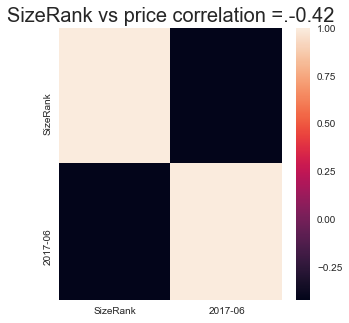

In [98]:
cor_val=df_NY_2006_2017['SizeRank'].corr(df_NY_2006_2017['2017-06'])
corr=df_NY_2006_2017[['SizeRank','2017-06']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title("SizeRank vs price correlation =.{}".format(round(cor_val,2)),fontsize=20, ha='center')
corr

Text(0.5,1,'Size Rank vs change Price 2006_2010 ')

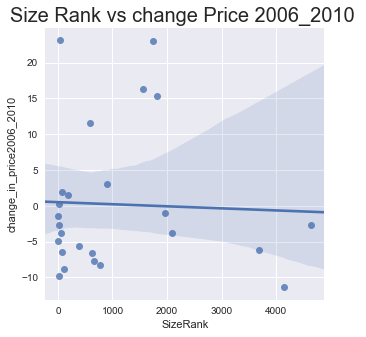

In [99]:
#for last 10 years lets see if there is any trend between population of zipcode and price.
# we can see that as the size rank increase the change in price also deacreases. lets see what corplot has to share. 
plt.figure(figsize=(5,5))
sns.regplot(x=df_NY_2006_2017['SizeRank'],y=df_NY_2006_2017['change_in_price2006_2010'])
plt.title("Size Rank vs change Price 2006_2010 ",fontsize=20, ha='center')

Text(0.5,1,'Size Rank vs change_in_price 2010_2014 ')

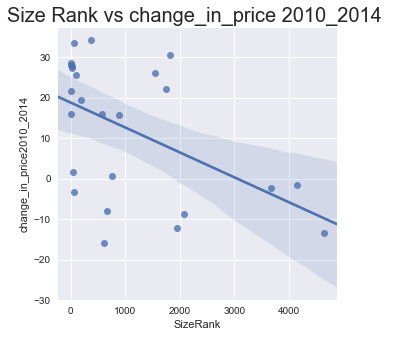

In [100]:
plt.figure(figsize=(5,5))
sns.regplot(x=df_NY_2006_2017['SizeRank'],y=df_NY_2006_2017['change_in_price2010_2014'])
plt.title("Size Rank vs change_in_price 2010_2014 ",fontsize=20, ha='center')

Text(0.5,1,'Size Rank vs change_in_price 2014_2017 ')

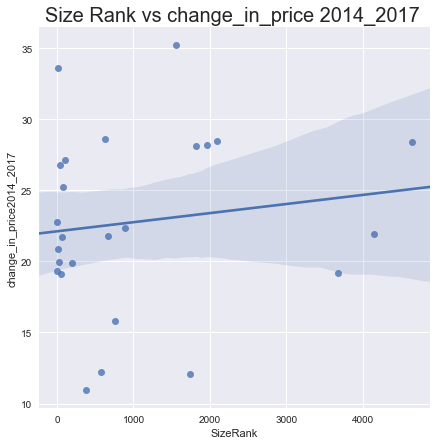

In [101]:
plt.figure(figsize=(7,7))
sns.regplot(x=df_NY_2006_2017['SizeRank'],y=df_NY_2006_2017['change_in_price2014_2017'])
plt.title("Size Rank vs change_in_price 2014_2017 ",fontsize=20, ha='center')

,SizeRank,change_in_price2006_2010
SizeRank,1.000000,-0.039649
change_in_price2006_2010,-0.039649,1.000000


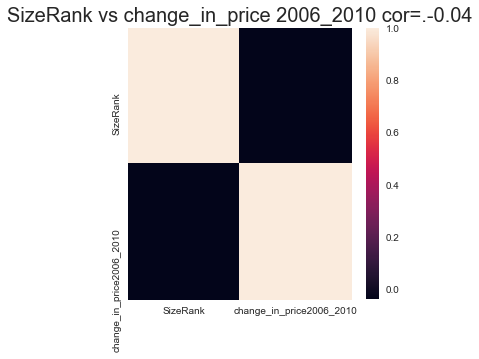

In [102]:
cor_val=df_NY_2006_2017['SizeRank'].corr(df_NY_2006_2017['change_in_price2006_2010'])
corr=df_NY_2006_2017[['SizeRank','change_in_price2006_2010']].corr()
plt.figure(figsize=(5,5))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title("SizeRank vs change_in_price 2006_2010 cor=.{}".format(round(cor_val,2)),fontsize=20, ha='center')
corr

,SizeRank,change_in_price2010_2014
SizeRank,1.000000,-0.502894
change_in_price2010_2014,-0.502894,1.000000


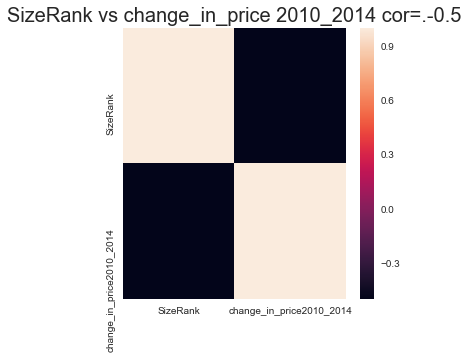

In [103]:
cor_val=df_NY_2006_2017['SizeRank'].corr(df_NY_2006_2017['change_in_price2010_2014'])
plt.figure(figsize=(5,5))
corr=df_NY_2006_2017[['SizeRank','change_in_price2010_2014']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title("SizeRank vs change_in_price 2010_2014 cor=.{}".format(round(cor_val,2)),fontsize=20, ha='center')
corr

,SizeRank,change_in_price2014_2017
SizeRank,1.000000,0.139378
change_in_price2014_2017,0.139378,1.000000


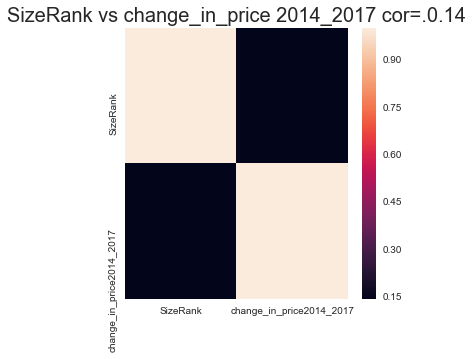

In [104]:
cor_val=df_NY_2006_2017['SizeRank'].corr(df_NY_2006_2017['change_in_price2014_2017'])
plt.figure(figsize=(5,5))
corr=df_NY_2006_2017[['SizeRank','change_in_price2014_2017']].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.title("SizeRank vs change_in_price 2014_2017 cor=.{}".format(round(cor_val,2)),fontsize=20, ha='center')
corr

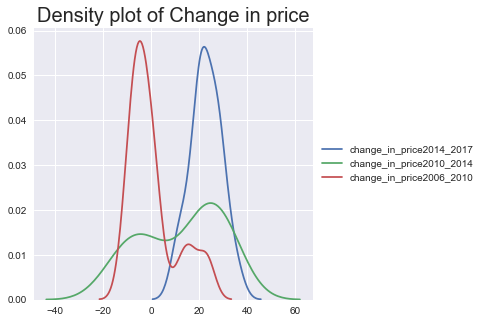

In [105]:
# lets see the kede plot.
plt.figure(figsize=(5,5))
sns.kdeplot(df_NY_2006_2017['change_in_price2014_2017'])
sns.kdeplot(df_NY_2006_2017['change_in_price2010_2014'])
sns.kdeplot(df_NY_2006_2017['change_in_price2006_2010'])
plt.title("Density plot of Change in price",fontsize=20, ha='center')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

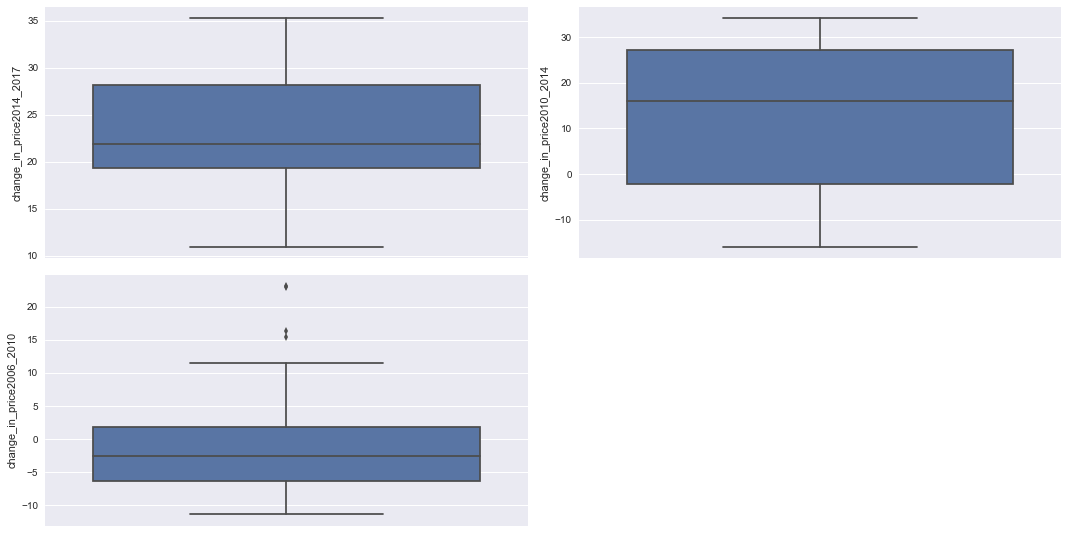

In [106]:
plt.figure(figsize=(15,15))
plt.subplot(421)
sns.boxplot(y=df_NY_2006_2017['change_in_price2014_2017'])
plt.subplot(422)
sns.boxplot(y=df_NY_2006_2017['change_in_price2010_2014'])
plt.subplot(423)
sns.boxplot(y=df_NY_2006_2017['change_in_price2006_2010'])
plt.tight_layout()



In [107]:
# Population plays a role in house prices.
#for investment purposes lets subset those data which lies inside the IQR
final_df= df_NY_2006_2017[(df_NY_2006_2017['change_in_price2014_2017'] >=15) & (df_NY_2006_2017['change_in_price2014_2017'] <=30)]
final_df.reset_index(inplace=True)
final_df.drop('index',axis=1)
final_df.columns
deciding_factor=['RegionName','change_in_price2010_2014',
       'change_in_price2014_2017']
final_df=final_df[deciding_factor]
final_df.set_index("RegionName",drop=True,inplace=True)

In [108]:
final_df.to_csv("final_df.csv")
final_df

,change_in_price2010_2014,change_in_price2014_2017
RegionName,,
10025,28.614,19.315
10023,21.628,22.779
10011,28.097,20.843
10003,27.755,19.958
11201,27.234,26.797
11234,1.687,19.144
10314,-3.329,21.690
11215,33.346,25.215
10028,25.495,27.161


# Listing data

In [109]:
dat = pd.read_csv('listings.csv')
dat.columns
important_columns=['id','name','host_since', 'host_response_rate','host_is_superhost','neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market','property_type', 'room_type', 'accommodates',
       'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet','price', 'security_deposit','cleaning_fee','guests_included', 'extra_people', 'minimum_nights',
       'maximum_nights', 'calendar_updated','availability_365','calendar_last_scraped','number_of_reviews','review_scores_rating',
'instant_bookable','cancellation_policy',]
dat_imp=dat[important_columns]
state,st_cnt=np.unique(dat_imp['state'],return_counts=True)
NY_dict={'NY':'t','New York':'t','ny':'t'}
dat_imp['state']=dat_imp['state'].apply(lambda x:'NY'if x in NY_dict else x )

C:\Users\rohan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (43,88) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


# Research Question: Which zip code having two bedroom property in New York are best to invest.

# subseting the listing dataset into a datset having only 2 bedroom data in newyork

In [110]:
two_bed_prop= dat_imp[(dat_imp['bedrooms']==2.0) & (dat_imp['state']=='NY')]
two_bed_prop.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4893 entries, 12 to 40752
Data columns (total 34 columns):
id                              4893 non-null int64
name                            4892 non-null object
host_since                      4874 non-null object
host_response_rate              3585 non-null object
host_is_superhost               4874 non-null object
neighbourhood_cleansed          4893 non-null object
neighbourhood_group_cleansed    4893 non-null object
city                            4888 non-null object
state                           4893 non-null object
zipcode                         4831 non-null object
market                          4878 non-null object
property_type                   4893 non-null object
room_type                       4893 non-null object
accommodates                    4893 non-null int64
bathrooms                       4885 non-null float64
bedrooms                        4893 non-null float64
beds                            4890 non-nu

# visuvalizing missing values and thus proceding with feature enginering 

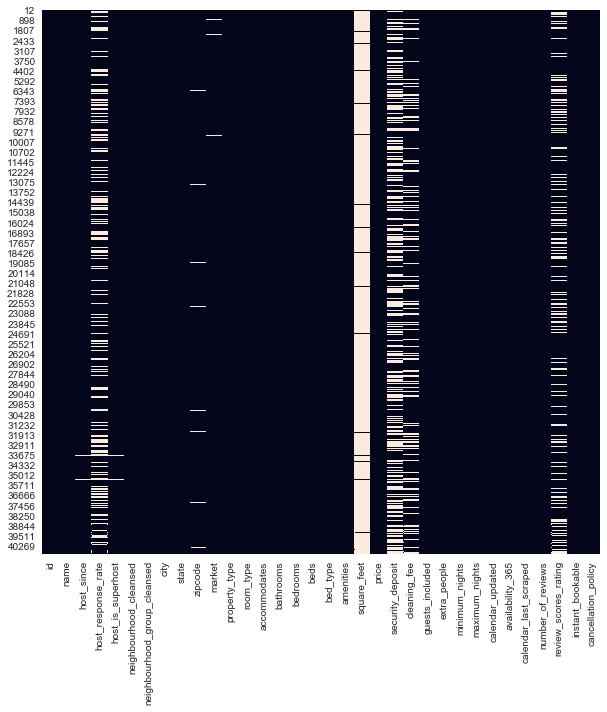

In [111]:
plt.figure(figsize=(10,10))
sns.heatmap(two_bed_prop.isnull(),cbar=False)

based on the plots above we need to remove response rate, squarefeet,security deposite,cleaning fee and review score rating from our dataset

In [112]:
coulums_toremove=['host_response_rate','square_feet','security_deposit', 'cleaning_fee','review_scores_rating']
two_bed_prop.drop(coulums_toremove,axis=1,inplace=True)
two_bed_prop.to_csv("two_bed_prop.csv")

C:\Users\rohan\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


in the dataset there are 62 elements which donot have zipcode, i am computing those zipcode based on that zipcode which has the minimum listing in that neibhourhood as the zipcode is also not present in the street address. Then merge the new column for zipcode with no null values and removing the old column.

In [113]:
neighb_emptyzip= two_bed_prop[two_bed_prop['zipcode'].isnull()]['neighbourhood_cleansed']
def get_zipcode(neighb_emptyzip,two_bed_prop):
    final_output=[]
    for i in neighb_emptyzip:
        zips=two_bed_prop[(two_bed_prop['neighbourhood_cleansed']==i) & (two_bed_prop['zipcode'].isnull()==False)]['zipcode']
        value,count=np.unique(zips,return_counts=True)
        final_output.append(value[count.argmin()])
    return final_output
zipcode = get_zipcode(neighb_emptyzip,two_bed_prop)
f_zipcode=[]
temp_check= two_bed_prop['zipcode'].isnull() 
for i,v in enumerate(temp_check):
    if  v:
        f_zipcode.append(zipcode[0])
        zipcode.pop(0)
    else:
        f_zipcode.append(two_bed_prop['zipcode'].iloc[i])
two_bed_prop['zipcode_c']=f_zipcode
two_bed_prop.drop('zipcode',axis=1,inplace=True)

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\rohan\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


# Checking again for null values

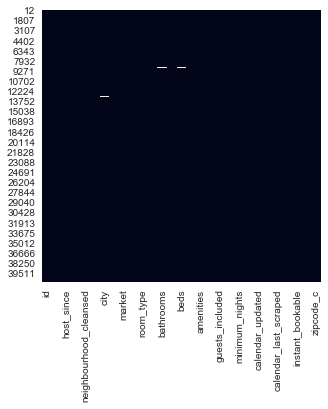

In [114]:
plt.figure(figsize=(5,5))
sns.heatmap(two_bed_prop.isnull(),cbar=False)

# Step 2 Which Zipcode have maximum listings.

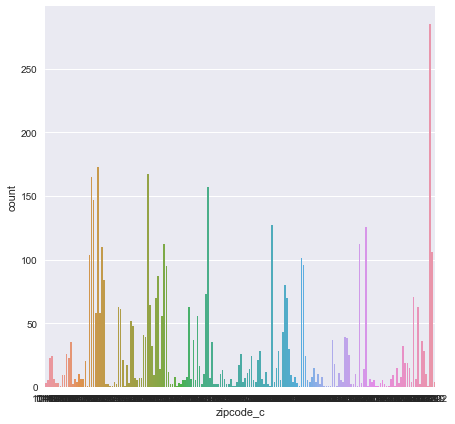

In [115]:
plt.figure(figsize=(7,7))
sns.countplot(x=two_bed_prop['zipcode_c'])

there are far many zipcodes lets chose another parameter that is 'neighbourhood_cleansed' or identify the areas per isting 

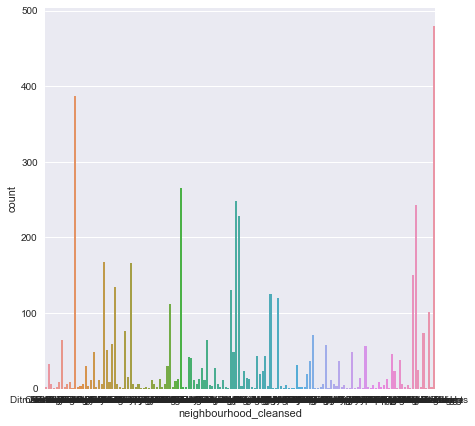

In [116]:
plt.figure(figsize=(7,7))
sns.countplot(x=two_bed_prop['neighbourhood_cleansed'])

Still there are many neighbourhood lets subcast the neighbour hood in the categories which have listing greator than 25 and less than 25

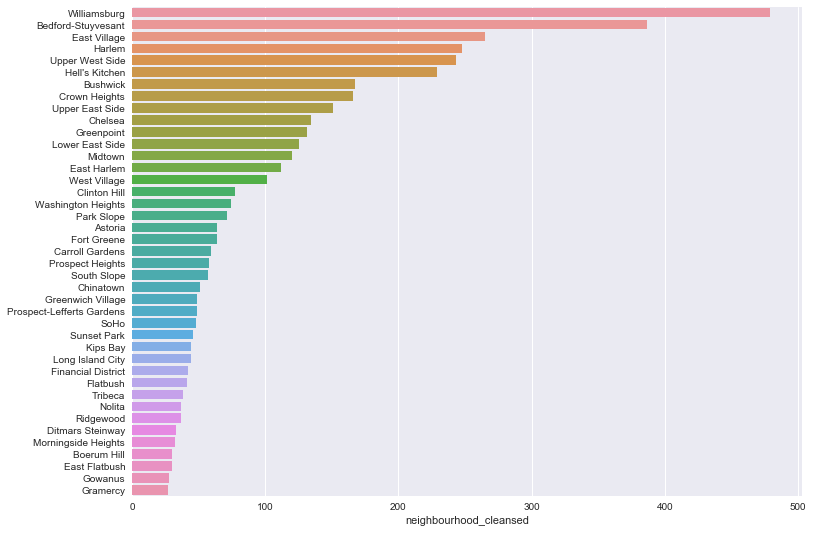

In [117]:
val_count_n=two_bed_prop['neighbourhood_cleansed'].value_counts()
plt.figure(figsize=(12,9))
sns.barplot(x=val_count_n[val_count_n >25] ,y=val_count_n[val_count_n >25].index,label=val_count_n[val_count_n >25].index)


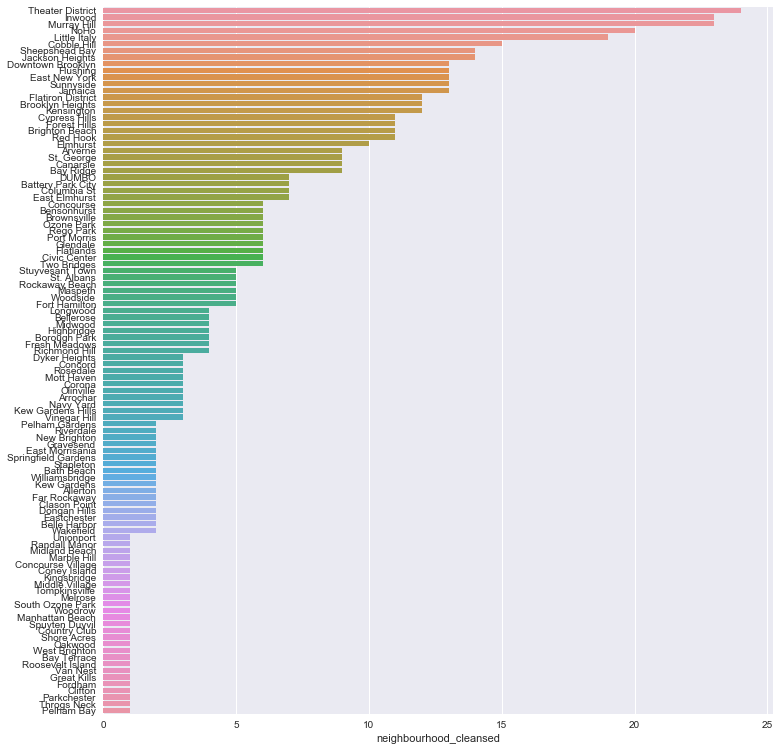

In [118]:
plt.figure(figsize=(12,13))
sns.barplot(x=val_count_n[val_count_n <25] ,y=val_count_n[val_count_n <25].index,label=val_count_n[val_count_n <25].index)

# To answer our research question lets concentrate on listings greator than count 25

In [119]:
columns_to_keep=['neighbourhood_cleansed', 'city','room_type','bathrooms','price','zipcode_c']
decision_data=two_bed_prop[columns_to_keep]
decision_data.reset_index(drop=True,inplace=True)
text=""
for i in val_count_n[val_count_n >25].index:
    text+=chr(40)+'decision_data'+chr(91)+"'neighbourhood_cleansed'"+chr(93)+chr(61)+chr(61)+chr(39)+i+chr(39)+chr(41)+chr(124)
decision_data_freq=decision_data[(decision_data['neighbourhood_cleansed']=='Williamsburg')|(decision_data['neighbourhood_cleansed']=='Bedford-Stuyvesant')|(decision_data['neighbourhood_cleansed']=='East Village')|(decision_data['neighbourhood_cleansed']=='Harlem')|(decision_data['neighbourhood_cleansed']=='Upper West Side')|(decision_data['neighbourhood_cleansed']=="Hell's Kitchen")|(decision_data['neighbourhood_cleansed']=='Bushwick')|(decision_data['neighbourhood_cleansed']=='Crown Heights')|(decision_data['neighbourhood_cleansed']=='Upper East Side')|(decision_data['neighbourhood_cleansed']=='Chelsea')|(decision_data['neighbourhood_cleansed']=='Greenpoint')|(decision_data['neighbourhood_cleansed']=='Lower East Side')|(decision_data['neighbourhood_cleansed']=='Midtown')|(decision_data['neighbourhood_cleansed']=='East Harlem')|(decision_data['neighbourhood_cleansed']=='West Village')|(decision_data['neighbourhood_cleansed']=='Clinton Hill')|(decision_data['neighbourhood_cleansed']=='Washington Heights')|(decision_data['neighbourhood_cleansed']=='Park Slope')|(decision_data['neighbourhood_cleansed']=='Astoria')|(decision_data['neighbourhood_cleansed']=='Fort Greene')|(decision_data['neighbourhood_cleansed']=='Carroll Gardens')|(decision_data['neighbourhood_cleansed']=='Prospect Heights')|(decision_data['neighbourhood_cleansed']=='South Slope')|(decision_data['neighbourhood_cleansed']=='Chinatown')|(decision_data['neighbourhood_cleansed']=='Greenwich Village')|(decision_data['neighbourhood_cleansed']=='Prospect-Lefferts Gardens')|(decision_data['neighbourhood_cleansed']=='SoHo')|(decision_data['neighbourhood_cleansed']=='Sunset Park')|(decision_data['neighbourhood_cleansed']=='Kips Bay')|(decision_data['neighbourhood_cleansed']=='Long Island City')|(decision_data['neighbourhood_cleansed']=='Financial District')|(decision_data['neighbourhood_cleansed']=='Flatbush')|(decision_data['neighbourhood_cleansed']=='Tribeca')|(decision_data['neighbourhood_cleansed']=='Ridgewood')|(decision_data['neighbourhood_cleansed']=='Nolita')|(decision_data['neighbourhood_cleansed']=='Ditmars Steinway')|(decision_data['neighbourhood_cleansed']=='Morningside Heights')|(decision_data['neighbourhood_cleansed']=='Boerum Hill')|(decision_data['neighbourhood_cleansed']=='East Flatbush')|(decision_data['neighbourhood_cleansed']=='Gowanus')|(decision_data['neighbourhood_cleansed']=='Gramercy')]
decision_data_freq.reset_index(drop=True,inplace=True)
a=decision_data_freq[['neighbourhood_cleansed','price']]
a.reset_index(drop=True,inplace=True)
a['price'] = a['price'].str.replace(',', '')
a['price'] = a['price'].str.replace('$', '')
a['price'] = pd.to_numeric(a['price'])

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in t

Text(0.5,1,'Important Area vs Price')

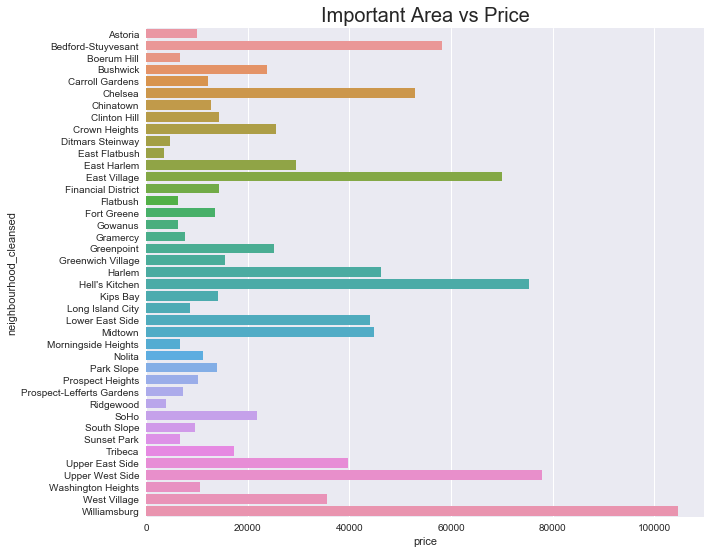

In [120]:
b=a.groupby('neighbourhood_cleansed')
b=b.sum()
#plot of graph area vs price:
plt.figure(figsize=(10,9))
sns.barplot(x=b['price'],y=b.index)
plt.title("Important Area vs Price",fontsize=20, ha='center')

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rohan\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0.5,1,'Important Area via zip code vs Price')

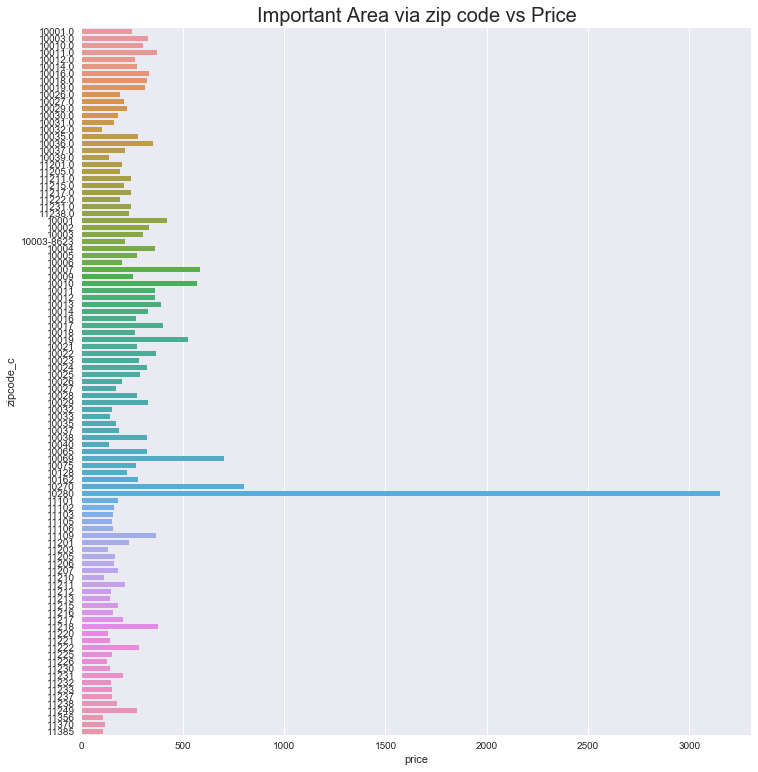

In [121]:
a['zipcode_c']=decision_data_freq['zipcode_c']
a.drop('neighbourhood_cleansed',axis=1,inplace=True)
b=a.groupby('zipcode_c')
b=b.mean()
#plot of graph zipcode vs price:
plt.figure(figsize=(12,13))
sns.barplot(x=b['price'],y=b.index)
plt.title("Important Area via zip code vs Price",fontsize=20, ha='center')

# lets concentrate only on Newyork city and exclude near by city

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

Text(0.5,1,'Important Area In New York City vs Price')

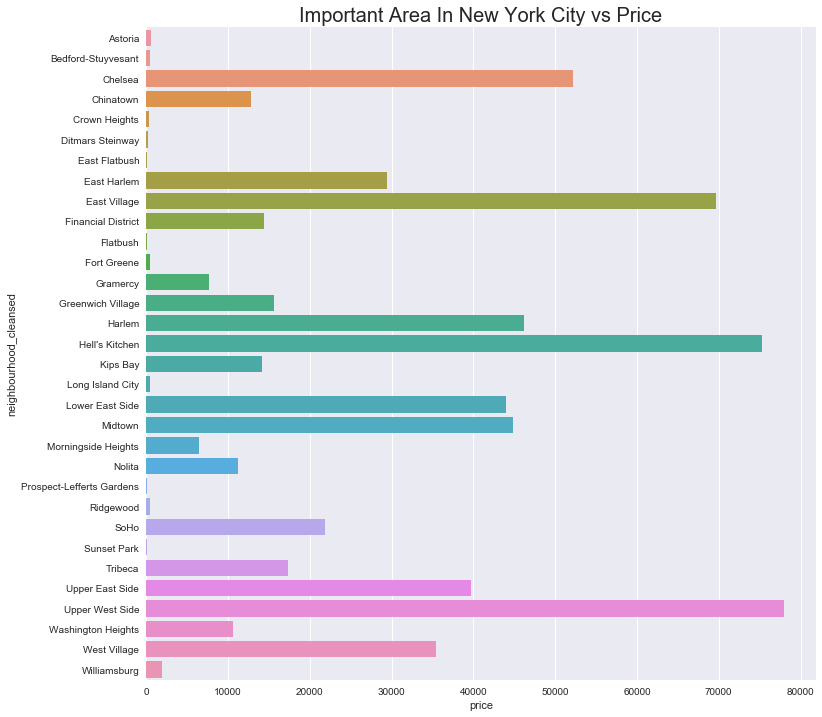

In [122]:
decision_data_freq_NY=decision_data_freq[decision_data_freq['city']=='New York']
decision_data_freq_NY.reset_index(drop=True,inplace=True)
a=decision_data_freq_NY[['neighbourhood_cleansed','price']]
a.reset_index(drop=True,inplace=True)
a['price'] = a['price'].str.replace(',', '')
a['price'] = a['price'].str.replace('$', '')
a['price'] = pd.to_numeric(a['price'])
b=a.groupby('neighbourhood_cleansed')
b=b.sum()
#plot of graph area vs price:
plt.figure(figsize=(12,12))
sns.barplot(x=b['price'],y=b.index)
plt.title("Important Area In New York City vs Price",fontsize=20, ha='center')

if we comapare above plot with the plot which had total listing price sum per neighbour hood cleansed we will notice that the plot reveals that there are few property in some areas like williamsburg which generates profit but zipcode lies outside New York city for further investment outside New York we can concentrate on those area as well 

C:\Users\rohan\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\rohan\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


Text(0.5,1,'Important Area In New York City via zip code vs Price')

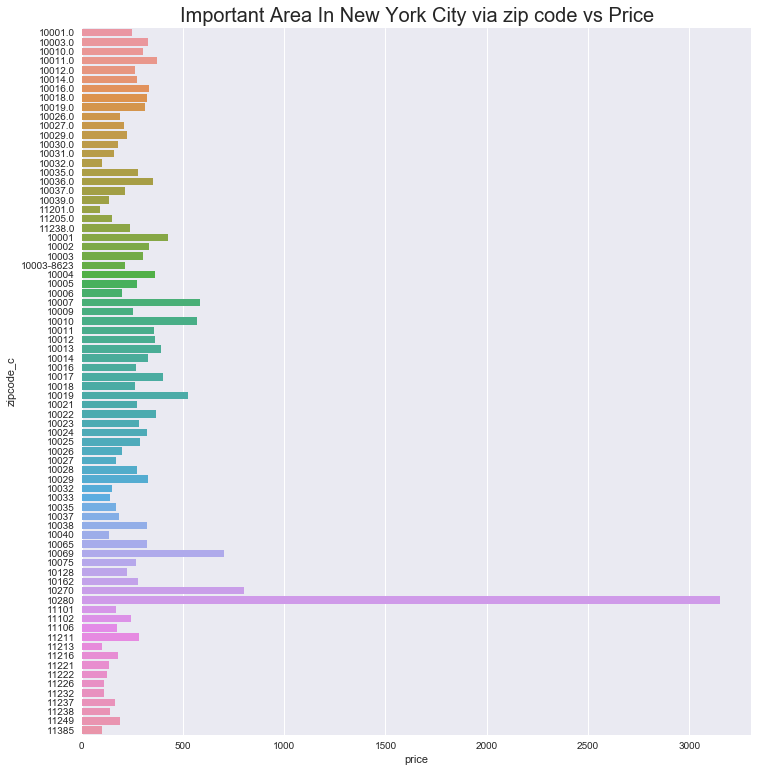

In [123]:
a['zipcode_c']=decision_data_freq_NY['zipcode_c']
a.drop('neighbourhood_cleansed',axis=1,inplace=True)
b=a.groupby('zipcode_c')
b=b.mean()
#plot of graph zipcode vs price:
plt.figure(figsize=(12,13))
sns.barplot(x=b['price'],y=b.index)
plt.title("Important Area In New York City via zip code vs Price",fontsize=20, ha='center')

10003-8623


C:\Users\rohan\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


Text(0.5,1,'Price vs Zipcode')

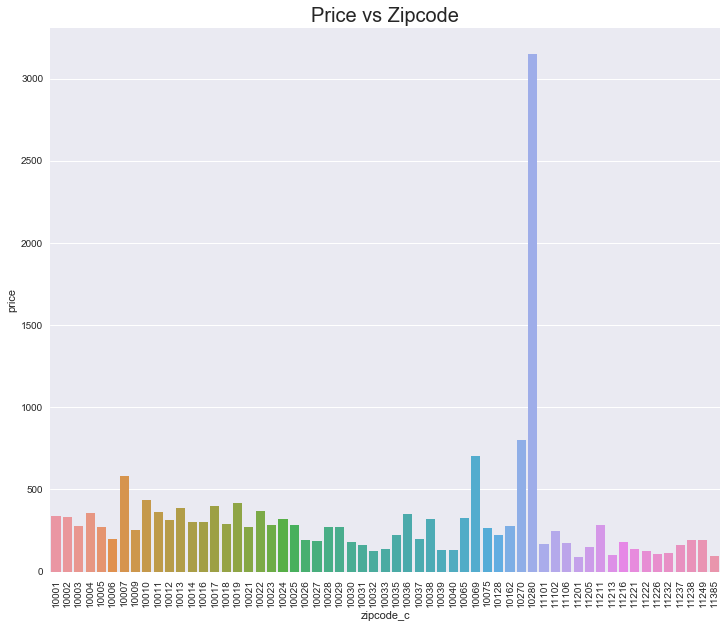

In [124]:
zip_code_price=b.reset_index()
zip_code_price['zipcode_c'] = zip_code_price['zipcode_c'].apply(lambda x: str(x))
for i,v in enumerate(zip_code_price['zipcode_c']):
    if '-' in v:
        a=v.split('-')
        print(zip_code_price['zipcode_c'].iloc[i])
        zip_code_price['zipcode_c'].iloc[i]=a[0]
zip_code_price['zipcode_c']=pd.to_numeric(zip_code_price['zipcode_c'])
zip_code_price['zipcode_c']=zip_code_price['zipcode_c'].astype(int)
zip_code_price =zip_code_price.groupby('zipcode_c').mean()
plt.figure(figsize=(12,10))
sns.barplot(y=zip_code_price['price'],x=zip_code_price.index)
plt.xticks(rotation=90)
plt.title("Price vs Zipcode",fontsize=20, ha='center')

# lets merge the final.df dataset and zip code price to find those zipcodes where listings happens most of the time

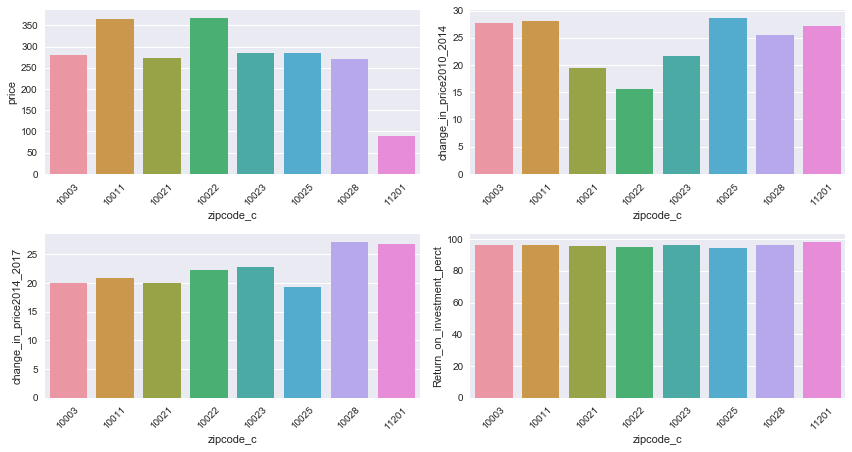

In [125]:
zillow_final=pd.read_csv('final_df.csv')
zillow_final
zip_code_price.reset_index(inplace=True)
zillow_final['zipcode_c']=zillow_final['RegionName']
zillow_final.drop('RegionName',axis=1,inplace=True)
zillow_listing=pd.merge(zip_code_price,zillow_final, on = ['zipcode_c'],how='inner')
pruch_price=[2147000,2480400,1815600,2031600,2142300,1431000,2083900,1420700]
zillow_listing['purchse_price']=pruch_price
zillow_listing['Return_on_investment_perct']=((zillow_listing['purchse_price']-(zillow_listing['price']*273))/zillow_listing['purchse_price'])*100
zillow_listing
plt.figure(figsize=(12,12))
plt.subplot(421)
sns.barplot(y=zillow_listing['price'],x=zillow_listing['zipcode_c'])
plt.xticks(rotation=45)
plt.subplot(422)
sns.barplot(y=zillow_listing['change_in_price2010_2014'],x=zillow_listing['zipcode_c'])
plt.xticks(rotation=45)
plt.subplot(423)
sns.barplot(y=zillow_listing['change_in_price2014_2017'],x=zillow_listing['zipcode_c'])
plt.xticks(rotation=45)
plt.subplot(424)
sns.barplot(y=zillow_listing['Return_on_investment_perct'],x=zillow_listing['zipcode_c'])
plt.xticks(rotation=45)
plt.tight_layout()

 Note: The return on investment is calculated as:
((The price in 2017-1) – ((0.75 '*' 365) '*' (mean Price of zip code of listing))/ (The price in 2017-1 )


# Step 2 Time Series Forecasting for zipcode 10025(as an example) just to be sure that the zipcode is going to increase

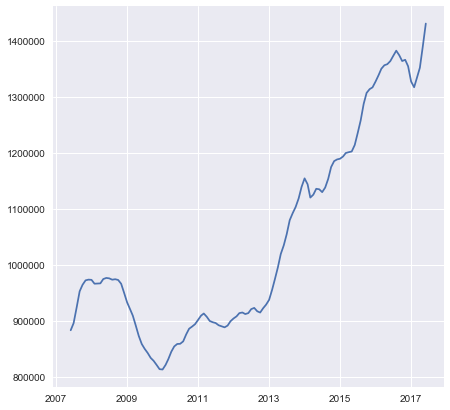

In [126]:
time_series=df_ny_years_t.dropna()
time_series=time_series[10025]
time_series=pd.DataFrame(time_series)
plt.figure(figsize=(7,7))
plt.plot(time_series)

Text(0.5,1,'Rolling mean & Standard deviation')

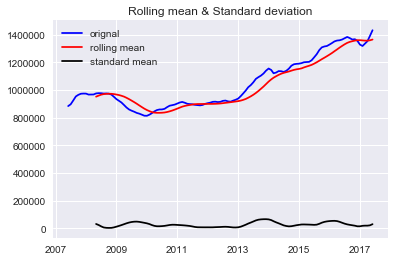

In [127]:
# checking stationarity which is visible that it is not.
rolmean=time_series.rolling(window=12).mean()
rolstd=time_series.rolling(window=12).std()
orig= plt.plot(time_series,color='blue',label='orignal')
mean= plt.plot(rolmean,color='red',label='rolling mean')
std= plt.plot(rolstd,color='black',label='standard mean')
plt.legend(loc='best')
plt.title("Rolling mean & Standard deviation")
# hence data is not stationary.

In [128]:
#perform dicky fuller test. for statistical proof.
from statsmodels.tsa.stattools import adfuller
df_test =adfuller(time_series[10025],autolag='AIC')
df_out=pd.Series(df_test[0:4],index=['Test Statistics','p-value','#Lags Used','Number Of observations'])
for key,value in df_test[4].items():
    df_out['Critcal Value (%s)'%key]= value
print(df_out)
# hence we fail to reject the null hypothesis that is data is non stationary.

Test Statistics             0.789965
p-value                     0.991472
#Lags Used                  8.000000
Number Of observations    112.000000
Critcal Value (1%)         -3.490131
Critcal Value (5%)         -2.887712
Critcal Value (10%)        -2.580730
dtype: float64


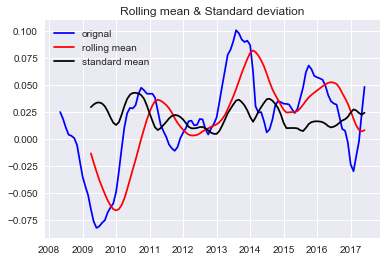

Test Statistics            -2.812357
p-value                     0.056530
#Lags Used                  4.000000
Number Of observations    105.000000
Critcal Value (1%)         -3.494220
Critcal Value (5%)         -2.889485
Critcal Value (10%)        -2.581676
dtype: float64


In [129]:
time_series_log= np.log(time_series)
Moving_average=time_series_log.rolling(window=12).mean()
Moving_std=time_series_log.rolling(window=12).std()
dif_log_moving=time_series_log-Moving_average
dif_log_moving.dropna(inplace=True)
# to avoid writing agaian and again i have written a function which check stationarity
from statsmodels.tsa.stattools import adfuller
def test_stationarity(time_series,a):
    moving_avg=time_series.rolling(window=12).mean()
    moving_std=time_series.rolling(window=12).std()
    orig= plt.plot(time_series,color='blue',label='orignal')
    mean= plt.plot(moving_avg,color='red',label='rolling mean')
    std= plt.plot(moving_std,color='black',label='standard mean')
    plt.legend(loc='best')
    plt.title("Rolling mean & Standard deviation")
    plt.show(block=False)
    
    df_test =adfuller(time_series[a],autolag='AIC')
    df_out=pd.Series(df_test[0:4],index=['Test Statistics','p-value','#Lags Used','Number Of observations'])
    for key,value in df_test[4].items():
        df_out['Critcal Value (%s)'%key]= value
    print(df_out)
test_stationarity(dif_log_moving,10025)

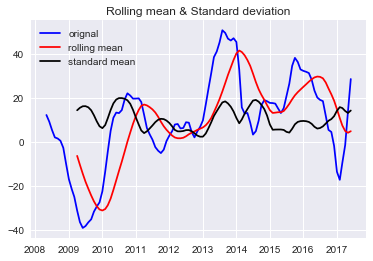

Test Statistics            -2.682758
p-value                     0.077070
#Lags Used                  4.000000
Number Of observations    105.000000
Critcal Value (1%)         -3.494220
Critcal Value (5%)         -2.889485
Critcal Value (10%)        -2.581676
dtype: float64


In [130]:
# still the data is not completly stationary.
#lets try with sqrt.
time_series_sqrt= np.sqrt(time_series)
Moving_average=time_series_sqrt.rolling(window=12).mean()
Moving_std=time_series_sqrt.rolling(window=12).std()
dif_sqrt_moving=time_series_sqrt-Moving_average
dif_sqrt_moving.dropna(inplace=True)
test_stationarity(dif_sqrt_moving,10025)

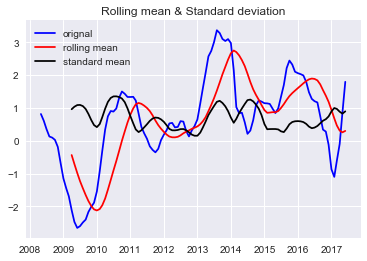

Test Statistics            -2.725783
p-value                     0.069682
#Lags Used                  4.000000
Number Of observations    105.000000
Critcal Value (1%)         -3.494220
Critcal Value (5%)         -2.889485
Critcal Value (10%)        -2.581676
dtype: float64


In [131]:
# still the data is not completly stationary.
#lets give it a try with cuberoot
time_series_cbrt= np.cbrt(time_series)
Moving_average=time_series_cbrt.rolling(window=12).mean()
Moving_std=time_series_cbrt.rolling(window=12).std()
dif_cbrt_moving=time_series_cbrt-Moving_average
dif_cbrt_moving.dropna(inplace=True)
test_stationarity(dif_cbrt_moving,10025)

# hence we can see out of all operation taking log brings us the closest to make data stationary.

Text(0.5,1,'Upward trend')

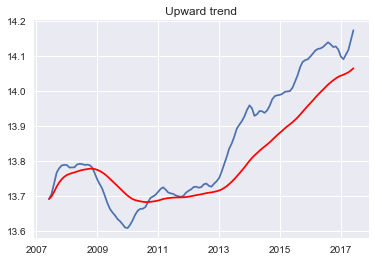

In [132]:
exponential_decay_wavg=time_series_log.ewm(halflife=12,min_periods=0,adjust=True).mean()
plt.plot(time_series_log)
plt.plot(exponential_decay_wavg,color='red')
plt.title('Upward trend')
# We can see as the trend increases the weighted average is also progressive.

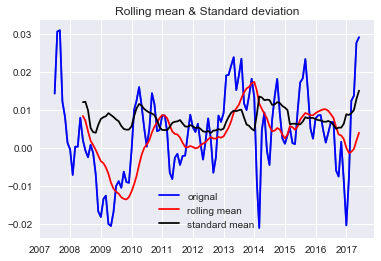

Test Statistics            -2.956506
p-value                     0.039161
#Lags Used                 13.000000
Number Of observations    106.000000
Critcal Value (1%)         -3.493602
Critcal Value (5%)         -2.889217
Critcal Value (10%)        -2.581533
dtype: float64


In [133]:
#out of all four transformation best to stick with is the log and the check the difrentiafiation to make time stationary .
dataset_shifting=time_series_log - time_series_log.shift(periods=1)
dataset_shifting.dropna(inplace=True)
plt.plot(dataset_shifting)
test_stationarity(dataset_shifting,10025)
#now we can say that data is kind of stationary.

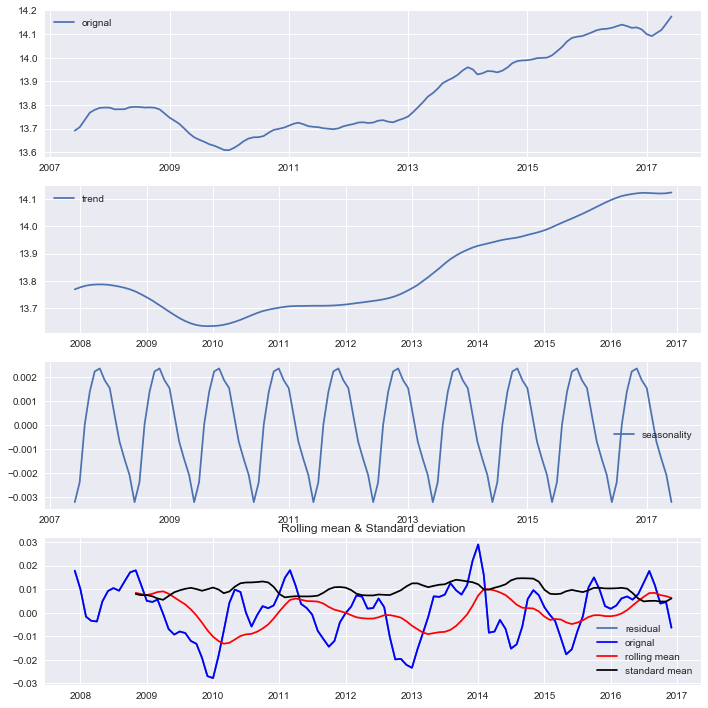

Test Statistics            -4.591136
p-value                     0.000134
#Lags Used                  3.000000
Number Of observations    105.000000
Critcal Value (1%)         -3.494220
Critcal Value (5%)         -2.889485
Critcal Value (10%)        -2.581676
dtype: float64


In [134]:
# Checking seasonality, trend and resediuals in data.
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(time_series_log)
trend=decomposition.trend
seasnol=decomposition.seasonal
residual=decomposition.resid
plt.figure(figsize=(10,10))
plt.subplot(411)
plt.plot(time_series_log,label='orignal')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend,label='trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasnol,label='seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual,label='residual')
plt.legend(loc='best')
plt.tight_layout()
#checking if noise is stationary.-----
decomposed_log_data=residual
decomposed_log_data.dropna(inplace=True)
test_stationarity(decomposed_log_data,10025)
#--noise is statio

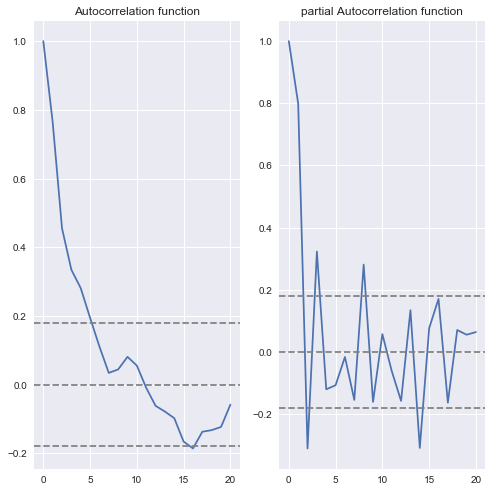

In [135]:
#ACF and PACF plot.
from statsmodels.tsa.stattools import acf,pacf
lag_acf=acf(dataset_shifting,nlags=20)
lag_pacf=pacf(dataset_shifting,nlags=20,method='ols')#ordinary least square method
#plotACF # to find values of q
plt.figure(figsize=(7,7))
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_shifting)) ,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_shifting)),linestyle='--',color='gray')
plt.title('Autocorrelation function')

#plotACF # to find values of p
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(dataset_shifting)) ,linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(dataset_shifting)),linestyle='--',color='gray')
plt.title('partial Autocorrelation function')
plt.tight_layout()




C:\Users\rohan\Anaconda3\lib\site-packages\statsmodels\base\model.py:488: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)


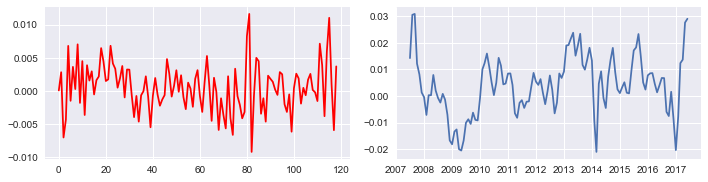

In [136]:
#finally appling ARIMA model
from statsmodels.tsa.arima_model import ARIMA
model= ARIMA(dataset_shifting[10025].values,order=(5,1,2))
result= model.fit()
pred_dif= pd.Series(result.fittedvalues,copy=True)
plt.figure(figsize=(10,10))
plt.subplot(421)
plt.plot(result.fittedvalues,color='red')
plt.subplot(422)
plt.plot(dataset_shifting)
plt.tight_layout()

# I can see that our prediction has captured the essence of time variation in our data But it would have done better if i could have found a better transformation tomake the time series stationary.
# now to forecast future .

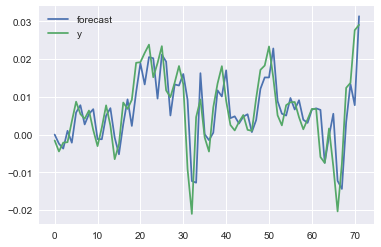

<Figure size 864x864 with 0 Axes>

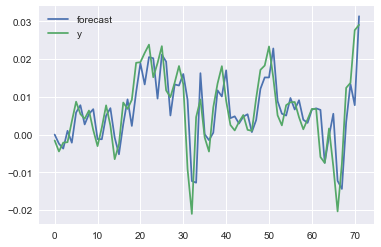

In [137]:
plt.figure(figsize=(12,12))
result.plot_predict(48)

Thus we confirm that investing in zipcode 10025 is not abad idea the same can be followed to seven different zipcode.

# Analysis by Rohan Gupta. Thank You!